In [ ]:
# Check if we are using the GPU
!nvidia-smi

Tue Feb 15 01:59:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Creating helper functions

In [ ]:
# Previous notebook

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-15 01:59:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-15 01:59:40 (56.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions we are going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves


In [ ]:
from helper_functions import unzip_data, walk_through_dir

**Note** if you are running this notebook in Google Colab, when it times out colab will delete "helper_functions".
so you will have to redownload it if you want to access to your helper functions

## Let's get some data

This time we are going to see how we can use the pretrained models within tf.keras.applications 

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2022-02-14 12:54:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   109MB/s    in 1.5s    

2022-02-14 12:54:11 (109 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
# Check out how many images and subdirectories are in our datasets
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_

In [ ]:
# Create training and test directory paths
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
# Check out classs name of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.62857132e+01 1.32857151e+01 4.28571415e+00]
   [1.52142859e+01 1.22142859e+01 3.21428585e+00]
   [1.42857141e+01 1.12857141e+01 3.85714316e+00]
   ...
   [3.70663338e+01 2.80663319e+01 2.10663319e+01]
   [3.54489403e+01 2.64489403e+01 1.94489403e+01]
   [3.38163261e+01 2.48163280e+01 1.78163280e+01]]

  [[1.40714283e+01 1.40714283e+01 4.07142830e+00]
   [1.50000000e+01 1.50000000e+01 7.00000000e+00]
   [1.50000000e+01 1.50000000e+01 7.00000000e+00]
   ...
   [3.71734695e+01 2.81734695e+01 2.11734695e+01]
   [3.62244682e+01 2.72244701e+01 2.02244701e+01]
   [3.71479530e+01 2.81479511e+01 2.11479511e+01]]

  [[1.33571424e+01 1.47857141e+01 7.00000000e+00]
   [1.23265305e+01 1.37551022e+01 5.96938753e+00]
   [1.19285707e+01 1.33571424e+01 6.80612230e+00]
   ...
   [3.39285431e+01 2.49285450e+01 1.83571167e+01]
   [2.71274681e+01 1.81274681e+01 1.15560389e+01]
   [2.57806072e+01 1.67806072e+01 1.02091789e+01]]

  ...

  [[6.08673744e+01 4.32959023e+01 2.90816383e+01]
   [5

## Model 0 : Building a transfer learning feature extraction model using the Keras Functional API


In [ ]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# 2. Freeze the base model (so the underlying pre-trained patterns
# aren't updated during training)
base_model.trainable = False
# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
# 4. If using ResNet50V2 you will need to normalized inputs 
#x = tf.keras.layers.exprimental.preprocessing.Rescalling(1,/255)
# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
# 6. Average pool the output of the base model (aggregate all the most important information
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pool")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")
#7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
# 8. Combine the inputs with outputs into
model_0 = tf.keras.Model(inputs,outputs)
# 9. Compile for the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10. Fit the model and save it's history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220209-055853


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - 26s 357ms/step - loss: 1.8607 - accuracy: 0.4333 - val_loss: 1.3575 - val_accuracy: 0.6941
Epoch 2/5
24/24 [==============================] - 7s 268ms/step - loss: 1.1396 - accuracy: 0.7467 - val_loss: 0.9381 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - 7s 261ms/step - loss: 0.8415 - accuracy: 0.8027 - val_loss: 0.7643 - val_accuracy: 0.8257
Epoch 4/5
24/24 [==============================] - 9s 354ms/step - loss: 0.6805 - accuracy: 0.8387 - val_loss: 0.6659 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 7s 263ms/step - loss: 0.5811 - accuracy: 0.8773 - val_loss: 0.6112 - val_accuracy: 0.8470


In [ ]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 0.6176 - accuracy: 0.8376


[0.6175616383552551, 0.8375999927520752]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [ ]:
# How about we get a summary of the base model?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pool (Global  (None, 1280)             0         
 AveragePooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

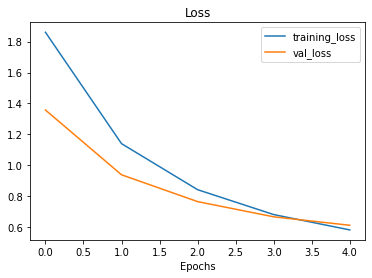

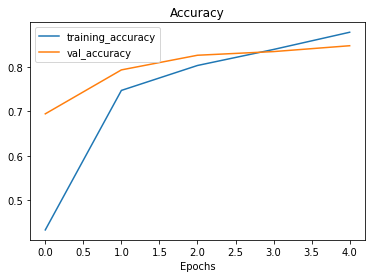

In [ ]:
# Check out our model's training curves 
plot_loss_curves(history_10_percent)

# Getting a feature vector from a trained model

Lets demonstrate the Global Average Pooling 2D layers...

We have a tensor after our model goes through "base_model" of shape(None,7,7,1280)...

But when it passes through GlobalAveragePooling2D, it turns into (None , 1280)


In [ ]:
# Define the input shape
input_shape = (1,4,4,3)
# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")
# Pass the random tensor through a global average pooling 2D layers
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")
# check the shape of the dofferent tensors
print(f"Shape of the input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of the input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [ ]:
# Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning experiments

from 10% to 1% of training data
1. **model_1** : use feature extraction transfer learning with 1% of the training data with data augmentation

2. **model_2** : use feature extraction transfer learning with 10% of the training with the data augmentation

3. **model_3** : use fine-tuning trasnsfer learning on 10% of the training data with data augmentation

4. **model_4** : use fine-tuning trasfer learning in 100% of the training data with data augmentation

**Note:** same datasets will be use 

In [ ]:
# Download and unzip data - preprocessed from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-02-09 21:46:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 74.125.129.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  88.8MB/s    in 1.4s    

2022-02-09 21:46:37 (88.8 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
# How many images are we working with?
walk_through_dir("10_food_classes_1_percent/")

There are 2 directories and 0 images in '10_food_classes_1_percent/'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon

## Getting and preprocessing data for model_1

In [ ]:
import tensorflow as tf

In [ ]:
# Setup data loader
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32) # default

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

To add data augmentation right into our models, we can use the layers inside:

* `tf.keras.layers.experimental.preprocessing()`
* 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# Create data augmentation stage with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
# preprocessing.Rescale(1./255), # Keep for models like ResNet50V2 
# but EfficientNet is having build-in rescaling 
],   name="data_augmentation"
)

Visualize our data augmentation layer (and see what happens to our data)

In [ ]:
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


`tf.keras.layers.experimental.preprocessing.RandomZoom`

## Adding data augmentation right into the model
* `tf.keras.layers.experimental.preprocessing()`

In [ ]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + 
               target_class 
target_dir
random_image=random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image)
# Read in the random image
print(random_image_path)
img = mpimg.imread(random_image_path) 
plt.imshow(img)
plt.title(f"random image from class : {target_class}")
plt.axis(False)
#print(img)
# Let's plot our augmented random image
augmentaed_img = data_augmentation(img)
plt.figure()
augmentaed_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.imshow(tf.squeeze(augmentaed_img)/255.)
plt.title(f"augmented image from class : {target_class}")
plt.axis(False)

SyntaxError: ignored

Model 1 : Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# 1. Setup input shape and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# 2. Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# 3. Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# 4. Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# 5. Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layers")(x)

# 7. Make a model using the inputs and outputs
model_1 = keras.Model(inputs,outputs)

# 8. Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 9. Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(
                                    dir_name="transfer_learning",
                                    experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220209-063851


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
3/3 [==============================] - 61s 22s/step - loss: 2.3964 - accuracy: 0.1000 - val_loss: 2.3352 - val_accuracy: 0.0806
Epoch 2/5
3/3 [==============================] - 45s 21s/step - loss: 2.1746 - accuracy: 0.2000 - val_loss: 2.2310 - val_accuracy: 0.1349
Epoch 3/5
3/3 [==============================] - 45s 21s/step - loss: 2.0122 - accuracy: 0.3571 - val_loss: 2.1153 - val_accuracy: 0.2007
Epoch 4/5
3/3 [==============================] - 44s 21s/step - loss: 1.7468 - accuracy: 0.6000 - val_loss: 1.9923 - val_accuracy: 0.3141
Epoch 5/5
3/3 [==============================] - 45s 21s/step - loss: 1.6646 - accuracy: 0.6000 - val_loss: 1.9020 - val_accuracy: 0.3882


In [ ]:
target_class

'fried_rice'

In [ ]:
target_dir

'/content/10_food_classes_1_percent/train/fried_rice'

# Model 2: 

> Feature extraction transfer learning model with 10% of data and data augmentation

In [ ]:
# Get the 10%of the data .....
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2022-02-15 02:00:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   214MB/s    in 0.8s    

2022-02-15 02:00:28 (214 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
test_dir = "/content/10_food_classes_10_percent/test/"
train_dir_10_percent = "/content/10_food_classes_10_percent/train/"

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE = (224,224)

In [ ]:
# how many images in our directories?
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode="categorical",
    image_size=IMG_SIZE
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential 

In [ ]:
# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255)
  # if you are using model such as ResNet50v2, you will need
  # to rescale your data, efficeintnet as rescaling built-in
], name="data_augmentation")
# data_augmentation.summary()

# Setup the inpurt shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the input and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images
# (augmentation doesn't occur on test data)
x = base_model(x, training=False) # pass augmented images to base model
# in infereance mode, this also insure batchnorms layer doesn't get updated
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

# Compile 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

# What are callbacks ?
>
* Callbacks are a tool which can add helpful functionality to your models during training, evaluation or inferance 

> TensorBoard 
* `tf.keras.callbacks.TensorBoard()`

> Model Checkpoinint 
* `tf.keras.callbacks.ModelCheckpoint()`

> Early Stopping
* `tf.keras.callbacks.EarlyStopping`

# Creating a ModelCheckpoint Callback

* The ModelCheckpoint callback intermediately saves our model (the full model or just weights) during training.
 
This is useful so we can come and start where we left off

In [ ]:
# Set checkpoint path 
checkpoint_path = "ten_percent_model_checkpoints_weight/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq="epoch",
                                                         verbose=1)

# Fit model 2 passing in the ModelCheckpoint callback

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                      experiment_name="10_percent_data_aug"),
                                                     checkpoint_callback])


Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220215-020037
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0689 - accuracy: 0.3027
Epoch 00001: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 39s 796ms/step - loss: 2.0689 - accuracy: 0.3027 - val_loss: 1.5515 - val_accuracy: 0.6168
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3721 - accuracy: 0.6840
Epoch 00002: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 16s 666ms/step - loss: 1.3721 - accuracy: 0.6840 - val_loss: 1.1060 - val_accuracy: 0.7599
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0842 - accuracy: 0.7173
Epoch 00003: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 16s 637ms/step - loss: 1.0842 - accuracy: 0.7173 - val_loss: 0.8916 - val_accuracy: 0.7928
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9212 - accuracy: 0.7

In [ ]:
# Check model_2 results on all test_data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug 

79/79 [==============================] - 12s 143ms/step - loss: 0.6913 - accuracy: 0.8228


[0.6912581324577332, 0.8227999806404114]

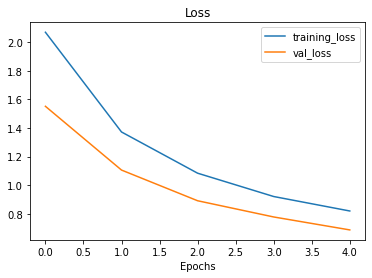

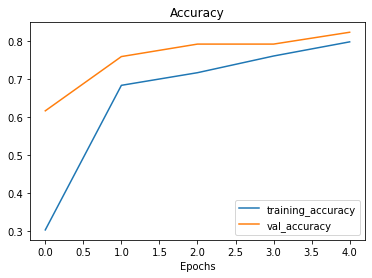

In [ ]:
# plot model loss curves
plot_loss_curves(history_10_percent_data_aug)

## Loading in checkpointed weights
Loading in checkpointed weights returns a model to a specifiv checkpoint

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
checkpoint_path

'ten_percent_model_checkpoints_weight/checkpoint.ckpt'

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.6913 - accuracy: 0.8228


In [ ]:
# If the results from our previously evaluated model_2 match the loaded weights,
# evereything has worked !
results_10_percent_data_aug

[0.6912581324577332, 0.8227999806404114]

In [ ]:
loaded_weights_model_results

[0.6912583112716675, 0.8227999806404114]

In [ ]:
 # Check to see if loaded model results are very close to our previous non-loaded model
 import numpy as np
 np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
# Check the differnce between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-1.78813934e-07  0.00000000e+00]


# Model 3 : Fine-tuning an existing model on 10% of the data

> **Note** : Fine-tuning usally works best after training a feature extraction model for epochs with large amount data

In [ ]:
# Layers in loaded model
model_2.layers 

In [ ]:
# Are these layers trainable?
for layer in model_2.layers:
   print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fcd2838b710> True
<keras.engine.sequential.Sequential object at 0x7fcd2839c610> True
<keras.engine.functional.Functional object at 0x7fcd27456e10> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fcd28832950> True
<keras.layers.core.dense.Dense object at 0x7fcd28832ed0> True


In [ ]:
# What layers are in our base_model (EfficientNetB0) are they trainable? 
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# How many traininable variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  print(layer.name)

input_1
rescaling
normalization
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expand
block3a_se_exci

In [ ]:
# To begin fine-tuning, 
# let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

 # Freeze all layers except for the last 10
for layers in base_model.layers[:-10]:
   layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001), 
# When fine tuning you typically want to lower the learning rate by 10x* 
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> **Note :** When using fine-tuning it's best practice to lower your learning rate by some amount. how much? This is a hyperparameter you can tune. But a good rule of thumb is at least 10x (though different sources will claim other values). 

In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 stem_conv_pad True
4 stem_conv True
5 stem_bn True
6 stem_activation True
7 block1a_dwconv True
8 block1a_bn True
9 block1a_activation True
10 block1a_se_squeeze True
11 block1a_se_reshape True
12 block1a_se_reduce True
13 block1a_se_expand True
14 block1a_se_excite True
15 block1a_project_conv True
16 block1a_project_bn True
17 block2a_expand_conv True
18 block2a_expand_bn True
19 block2a_expand_activation True
20 block2a_dwconv_pad True
21 block2a_dwconv True
22 block2a_bn True
23 block2a_activation True
24 block2a_se_squeeze True
25 block2a_se_reshape True
26 block2a_se_reduce True
27 block2a_se_expand True
28 block2a_se_excite True
29 block2a_project_conv True
30 block2a_project_bn True
31 block2b_expand_conv True
32 block2b_expand_bn True
33 block2b_expand_activation True
34 block2b_dwconv True
35 block2b_bn True
36 block2b_activation True
37 block2b_se_squeeze True
38 block2b_se_reshape True
39 block2b_se_reduce True
40 block

In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)   
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25 * len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               # start training from previous last epochs
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220215-020259
Epoch 5/10
24/24 [==============================] - 49s 2s/step - loss: 2.7080 - accuracy: 0.1440 - val_loss: 2.3725 - val_accuracy: 0.0938
Epoch 6/10
24/24 [==============================] - 33s 1s/step - loss: 2.3619 - accuracy: 0.0933 - val_loss: 2.3073 - val_accuracy: 0.1053
Epoch 7/10
24/24 [==============================] - 31s 1s/step - loss: 2.3184 - accuracy: 0.1080 - val_loss: 2.3072 - val_accuracy: 0.0954
Epoch 8/10
24/24 [==============================] - 32s 1s/step - loss: 2.3175 - accuracy: 0.1067 - val_loss: 2.3050 - val_accuracy: 0.1118
Epoch 9/10
24/24 [==============================] - 29s 1s/step - loss: 2.3065 - accuracy: 0.0920 - val_loss: 2.3013 - val_accuracy: 0.1069
Epoch 10/10
24/24 [==============================] - 31s 1s/step - loss: 2.3028 - accuracy: 0.1093 - val_loss: 2.2962 - val_accuracy: 0.1727


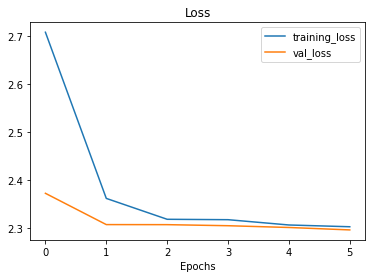

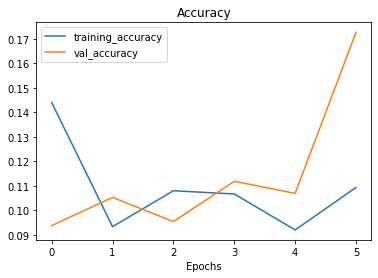

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

The `plot_loss_curves` function works great with models `fit()` with another (e.g. before and after fine-tuning).

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# Let's create a function to compare training histories
def compare_historys(orignal_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History objects.
  """
  # Get orignal history measurements
  acc = orignal_history.history["accuracy"]
  loss = orignal_history.history["loss"]

  val_acc = orignal_history.history["val_accuracy"]
  val_loss = orignal_history.history["val_loss"]

  # Combine orignal history metrics with new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots accuracy
  plt.figure(figsize=(16,16))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")

  # Make plot for loss
  plt.figure(figsize=(16,16))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label= "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Accuracy")

To train a fine-tuning model (model-4) we need to revert model_2 back to its feature extraction weights.

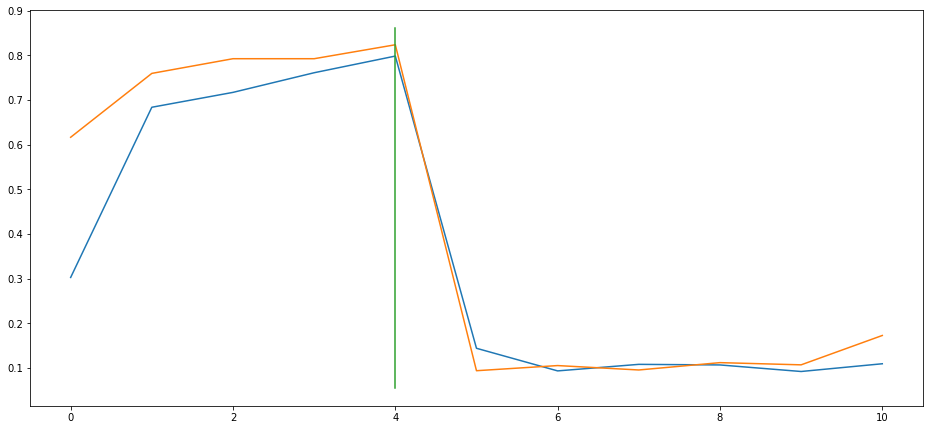

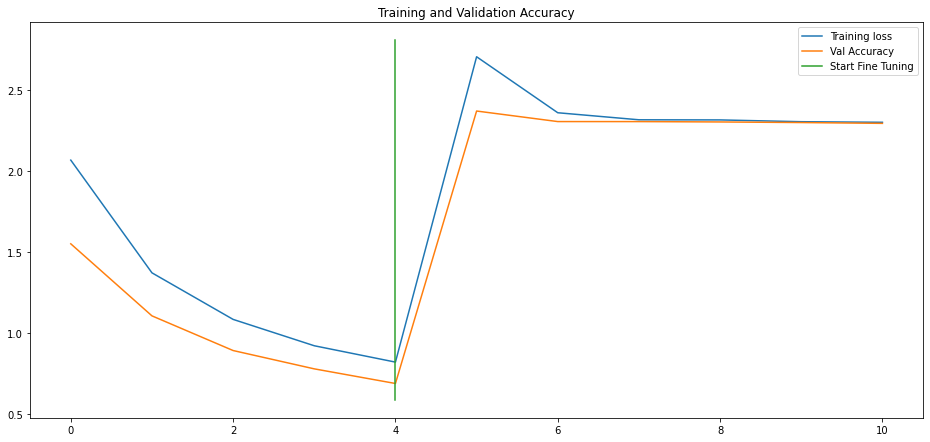

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

## Model 4: Fine-tuning and existing model on all of the data

In [ ]:
# Download and unzip 10 classes of Food101 data with all images 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-02-15 03:10:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   105MB/s    in 1.5s    

2022-02-15 03:10:34 (105 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
# Setup training and test dir
train_dir_all_data = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
# How many images are we working with now ?
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Evaluate model 2 (this is the fine-tuned on 10 percent of data version): 
model_2.evaluate(test_data)

79/79 [==============================] - 12s 136ms/step - loss: 2.2963 - accuracy: 0.1688


[2.296269416809082, 0.1687999963760376]

In [ ]:
# To train a fine-tuning model (model_4) we need to revert 
# model_2 back to it's feature extraction weights

# Load weights from checkpoint, that way we can fine-tune from
# the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path)

In [ ]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 12s 137ms/step - loss: 0.6913 - accuracy: 0.8228


[0.691257894039154, 0.8227999806404114]

In [ ]:
# Check to see if our model_2 has been reverted back to feature extraction results
results_10_percent_data_aug

[0.6912581324577332, 0.8227999806404114]

Alright, the previous steps might seem quite confusing but all we have done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data augmentation (model_2) and we saved the model's weights using `ModelCheckpoint` callback.

2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with  the top 10 layers of the base model unfrozen (model_3)

In [ ]:
# Check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 stem_conv_pad True
4 stem_conv True
5 stem_bn True
6 stem_activation True
7 block1a_dwconv True
8 block1a_bn True
9 block1a_activation True
10 block1a_se_squeeze True
11 block1a_se_reshape True
12 block1a_se_reduce True
13 block1a_se_expand True
14 block1a_se_excite True
15 block1a_project_conv True
16 block1a_project_bn True
17 block2a_expand_conv True
18 block2a_expand_bn True
19 block2a_expand_activation True
20 block2a_dwconv_pad True
21 block2a_dwconv True
22 block2a_bn True
23 block2a_activation True
24 block2a_se_squeeze True
25 block2a_se_reshape True
26 block2a_se_reduce True
27 block2a_se_expand True
28 block2a_se_excite True
29 block2a_project_conv True
30 block2a_project_bn True
31 block2b_expand_conv True
32 block2b_expand_bn True
33 block2b_expand_activation True
34 block2b_dwconv True
35 block2b_bn True
36 block2b_activation True
37 block2b_se_squeeze True
38 block2b_se_reshape True
39 block2b_se_reduce True
40 block

In [ ]:
 # Compile 
 model_2.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name="full_10_classes")])

Saving TensorBoard log files to: transfer_learning/full_10_classes/20220215-041233


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 0.4517 - accuracy: 0.8787
Epoch 6/10
24/24 [==============================] - 26s 1s/step - loss: 0.3345 - accuracy: 0.8827
Epoch 7/10
24/24 [==============================] - 24s 986ms/step - loss: 0.2702 - accuracy: 0.9200
Epoch 8/10
24/24 [==============================] - 23s 946ms/step - loss: 0.1624 - accuracy: 0.9587
Epoch 9/10
24/24 [==============================] - 25s 1s/step - loss: 0.1285 - accuracy: 0.9653
Epoch 10/10
24/24 [==============================] - 22s 930ms/step - loss: 0.0974 - accuracy: 0.9707


In [ ]:
compare_historys(orignal_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,
featurewise_std_normalization=False, 
samplewise_std_normalization=False,
zca_whitening=False, 
zca_epsilon=1e-06, rotation_range=0, 
width_shift_range=0.0,
height_shift_range=0.0, 
brightness_range=None, 
shear_range=0.0, 
zoom_range=0.0,
channel_shift_range=0.0, 
fill_mode='nearest', 
cval=0.0,
horizontal_flip=False, 
vertical_flip=False, 
rescale=None,
preprocessing_function=None, 
data_format=None, 
validation_split=0.0, 
dtype=None
)

In [ ]:
tf.keras.callbacks.ModelCheckpoint(
filepath,
monitor='val_loss',
verbose=0,
save_best_only=False,
save_weights_only=False,
mode='auto',
save_freq='epoch',    
options=None,
initial_value_threshold=None,
**kwargs
)

In [ ]:
tf.keras.applications.efficientnet.EfficientNetB0(
#	Whether to include the fully-connected layer at the top of the network.
# Defaults to True.
include_top=True, 
# One of None (random initialization), 
#'imagenet' (pre-training on ImageNet), 
# or the path to the weights file to be loaded. Defaults to 'imagenet'.
weights='imagenet',
# 	Optional Keras tensor 
# (i.e. output of layers.Input()) to use as image input for the model.
input_tensor=None,
# Optional shape tuple, only to be specified if include_top is False. 
# It should have exactly 3 inputs channels.
input_shape=None,
"""
Optional pooling mode for feature extraction when include_top is False.
Defaults to None.
None means that the output of the model will be the 4D tensor output 
of the last convolutional layer.
avg means that global average pooling will be applied to the output 
of the last convolutional layer, and thus the output of the model 
will be a 2D tensor.
max means that global max pooling will be applied.
"""
pooling=None,
"""
Optional number of classes to classify images into, only to be specified 
if include_top is True, and if no weights argument is specified. 
Defaults to 1000 (number of ImageNet classes).
"""
classes=1000,
"""
A str or callable. The activation function to use on the "top" layer. 
Ignored unless include_top=True. Set classifier_activation=None to 
return the logits of the "top" layer. Defaults to 'softmax'.
When loading \pretrained weights, classifier_activation can only 
be None or "softmax".
classifier_activation='softmax',
"""
**kwargs
)

In [ ]:
  #1. Create base model with tf.keras.applications
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  #2. Freeze the base model (so the pre-learned patterns remain)
  base_model.trainable = False
  #3. Create inputs into the base model
  inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layers")
  # 4. if using ResNet50v2, add this to speed up convergence, remove for EfficientNet
  # x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

  #5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet input)
  x = base_model(inputs)
  # Check data shape after passing it to base model
  print(f"Shape after base_model: {x.shape}")
  # 6. Average pool the outputs of the base model (aggregate all the most important information)
  x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layers")(x)
  print(f"After GlobalAveragePooling2D(): {x.shape}")
  # 7. Create the output activation layer
  outputs = tf.layers.Dense(10, activation="softmax", name="output_layer")(x)
  

In [ ]:
tf.keras.utils.image_dataset_from_directory(
directory,
labels='inferred',
label_mode='int',
class_names=None,
color_mode='rgb', 
batch_size=32, 
image_size=(256,256), 
shuffle=True, 
seed=None, 
validation_split=None, 
subset=None,
interpolation='bilinear', 
follow_links=False,
crop_to_aspect_ratio=False,
**kwargs
)